# Load data, train model, evaluate model, save model

In [10]:
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
from pandas import DataFrame, read_csv
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import numpy as np
from joblib import dump, load
import datetime


def get_time():
    now = datetime.datetime.now()
    return "%d%d%d-%d%d" % (now.year, now.month, now.day, now.hour, now.minute)



### Read the dataset, explore it and split into training and test data

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count           75.00000         75.000000          75.000000   
mean             5.78800          3.006667           3.692000   
std              0.71678          0.377522           1.658293   
min              4.30000          2.200000           1.100000   
25%              5.20000          2.800000           1.500000   
50%              5.80000          3.000000           4.300000   
75%              6.35000          3.200000           4.950000   
max              7.70000          4.200000           6.900000   

       petal width (cm)      class  
count         75.000000  75.000000  
mean           1.182667   0.973333  
std            0.729564   0.787973  
min            0.100000   0.000000  
25%            0.300000   0.000000  
50%            1.300000   1.000000  
75%            1.800000   2.000000  
max            2.400000   2.000000  
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0

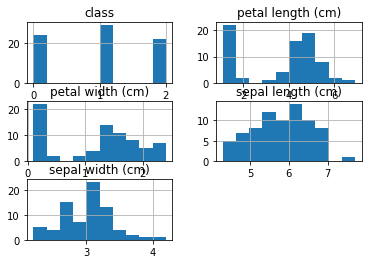

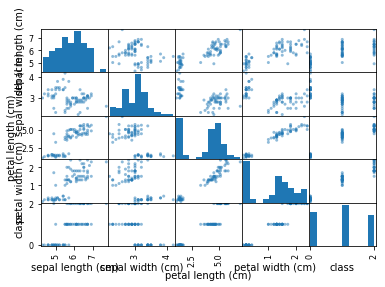

In [14]:
iris = read_csv('../data/training-data.csv')
print(iris.describe())

print(iris.head(20))
iris.hist()
plt.show()

scatter_matrix(iris)
plt.show()

X = iris.values[:, :-1]
Y = iris.values[:, -1]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

### Set hyperparameters and train the model

In [15]:
n_neighbours = 1
predictor = DecisionTreeClassifier()
predictor.fit(X_train, Y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

### Predict and show score

In [16]:
pred = predictor.predict(X_test)
score = accuracy_score(Y_test, pred)
print('score', score)



score 0.9473684210526315


### Do cross validation instead to see actual results

In [17]:
from sklearn.model_selection import cross_validate
scores = cross_validate(predictor, X, Y, cv=5, return_train_score=True)
print(np.mean(scores['test_score']))

0.9462820512820513


### Save the model in models folder

In [19]:
dump(predictor, '../models/model-%s.joblib' % get_time())

['../models/model-20191119-838.joblib']